Tomer's House project

In [ ]:
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

(576, 576)


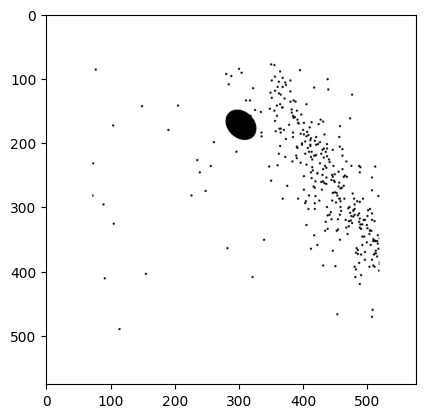

In [6]:
im = Image.open("data/line/line_00000.png")
print(im.size)
plt.imshow(im)

In [7]:
def count_files(class_type):
    return len(glob(f'data/{class_type}/**.png'))

We can see that the classes are basicclly balanced.
<br>but on closer lock we can see there are duplicates

In [11]:
from hs_utils import removing_files
removing_files()

In [12]:
for class_type in ['line', 'parabola', 'sine']:  
    class_num = count_files(class_type)
    print(f'{class_type}: {class_num}')

line: 33
parabola: 30
sine: 28


We can see there are "blobs" in the images - some kind of noise.
<br> Lets remove them using a basic conncted components algorithm.

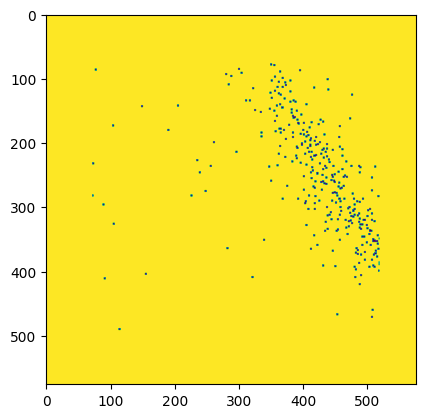

In [20]:
from hs_utils import remove_blobs
import cv2
remove_blobs()
im = cv2.imread("preprocessed_data/line/line_00000.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(im)

Lets run our baseline after this basic preprocessing

In [21]:
%run basic_cnn.py

Found 1121 files belonging to 3 classes.
Using 337 files for training.
Found 1121 files belonging to 3 classes.
Using 336 files for validation.
Epoch 1/25


2023-04-11 15:55:42.297877: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [337]
	 [[{{node Placeholder/_4}}]]
2023-04-11 15:55:42.298139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [337]
	 [[{{node Placeholder/_4}}]]


11/11 [==============================] - ETA: 0s - loss: 226.6868 - accuracy: 0.3175

2023-04-11 15:55:43.981268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [336]
	 [[{{node Placeholder/_4}}]]
2023-04-11 15:55:43.981756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [336]
	 [[{{node Placeholder/_4}}]]


11/11 [==============================] - 2s 43ms/step - loss: 226.6868 - accuracy: 0.3175 - val_loss: 62.8621 - val_accuracy: 0.3244
Epoch 2/25
11/11 [==============================] - 0s 17ms/step - loss: 20.2571 - accuracy: 0.3680 - val_loss: 7.2121 - val_accuracy: 0.5179
Epoch 3/25
11/11 [==============================] - 0s 17ms/step - loss: 5.7039 - accuracy: 0.3412 - val_loss: 0.9227 - val_accuracy: 0.6607
Epoch 4/25
11/11 [==============================] - 0s 17ms/step - loss: 2.3123 - accuracy: 0.3887 - val_loss: 2.6862 - val_accuracy: 0.3244
Epoch 5/25
11/11 [==============================] - 0s 17ms/step - loss: 1.9996 - accuracy: 0.5312 - val_loss: 1.3141 - val_accuracy: 0.6875
Epoch 6/25
11/11 [==============================] - 0s 16ms/step - loss: 1.1864 - accuracy: 0.5816 - val_loss: 1.8252 - val_accuracy: 0.6101
Epoch 7/25
11/11 [==============================] - 0s 17ms/step - loss: 1.6624 - accuracy: 0.6499 - val_loss: 1.5749 - val_accuracy: 0.6935
Epoch 8/25
11/11 [==

Let's try using a pretrained resnet50 with frozen weights and a very low learning rate - around 200,000 learnable parameters

In [4]:
%run resnet50.py

Found 91 files belonging to 3 classes.
Using 28 files for training.
Found 91 files belonging to 3 classes.
Using 27 files for validation.
Epoch 1/25


2023-04-11 16:17:17.202816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [28]
	 [[{{node Placeholder/_4}}]]
2023-04-11 16:17:17.203033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [28]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - ETA: 0s - loss: 1.0892 - accuracy: 0.5000

2023-04-11 16:17:19.118520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [27]
	 [[{{node Placeholder/_4}}]]
2023-04-11 16:17:19.118751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [27]
	 [[{{node Placeholder/_0}}]]


1/1 [==============================] - 2s 2s/step - loss: 1.0892 - accuracy: 0.5000 - val_loss: 0.9720 - val_accuracy: 0.6296
Epoch 2/25
1/1 [==============================] - 0s 152ms/step - loss: 1.0135 - accuracy: 0.5714 - val_loss: 0.9631 - val_accuracy: 0.7037
Epoch 3/25
1/1 [==============================] - 0s 145ms/step - loss: 0.9661 - accuracy: 0.6071 - val_loss: 0.9434 - val_accuracy: 0.6667
Epoch 4/25
1/1 [==============================] - 0s 148ms/step - loss: 0.9207 - accuracy: 0.6786 - val_loss: 0.9122 - val_accuracy: 0.7037
Epoch 5/25
1/1 [==============================] - 0s 149ms/step - loss: 0.8734 - accuracy: 0.7500 - val_loss: 0.8761 - val_accuracy: 0.7037
Epoch 6/25
1/1 [==============================] - 0s 167ms/step - loss: 0.8288 - accuracy: 0.7500 - val_loss: 0.8402 - val_accuracy: 0.7037
Epoch 7/25
1/1 [==============================] - 0s 146ms/step - loss: 0.7895 - accuracy: 0.7857 - val_loss: 0.8062 - val_accuracy: 0.7407
Epoch 8/25
1/1 [==================

Let's try and attack the problem from a different angle, hand crafted features:
<br> In the following block we will generate hand crafted features:
1. Average distance of the points from the regression line, assuming a plot more similar to a straight line will have a lower score.
2. frequency and amplitude
3. derivative average, median and different pecentiles values

In [6]:
%run hand_crafted_features.py

100%|██████████| 91/91 [01:03<00:00,  1.42it/s]


Lets train an xgboost on our new features:
<br>It's important to notice that we do not have a lot of sample and alot of features, these we will use shallow trees and a small amount of estimators.

In [8]:
%run xgboost_train.py

Best accuracy: 0.7365591397849464
complete results:
   param_learning_rate param_max_depth param_n_estimators  mean_test_score   
0                 0.01               3                  5         0.693548  \
1                 0.01               3                 10         0.682437   
2                 0.01               3                 15         0.682437   
3                 0.01               3                 20         0.649462   
4                 0.01               5                  5         0.616129   
5                 0.01               5                 10         0.626882   
6                 0.01               5                 15         0.626882   
7                 0.01               5                 20         0.626882   
8                  0.1               3                  5         0.649462   
9                  0.1               3                 10         0.670968   
10                 0.1               3                 15         0.670609   
11          

The xgboost results aren't as good. It might due to the following reasons
1. The hand crafted features can be better, they do not grasp the difference of the data.
2. Resnet is pretrained on imagenet and holds a lot of information, information that can not be gained using full training on 90 sample set.